# E-commerce Price Prediction: Weekend Hackathon #8 (EDA&Feature engg)

--------------------------------------------------------------------------------------------------------------------------------


![Alt_text](https://www.machinehack.com/wp-content/uploads/2020/06/E-COMMERCEBANNER-02-1536x864.jpg)

E-commerce platforms have been in existence for more than 2 decades now. The popularity and its preference as a common choice for buying and selling essential products have grown rapidly and exponentially over the past few years. E-commerce has impacted the lifestyle of common people to a huge extent. Many such platforms are competing over each other for dominance by providing consumer goods at a competitive price. In this hackathon, we challenge data science enthusiasts to predict the price of commodities on an e-commerce platform.

Given are 7 distinguishing factors that can influence the price of a product on an e-commerce platform. Your objective as a data scientist is to build a machine learning model that can accurately predict the price of a product based on the given factors.


**Data Description:-**

The unzipped folder will have the following files.

* Train.csv –  2452 observations.
* Test.csv –  1051 observations.
* Sample Submission – Sample format for the submission.

![Alt text](https://www.machinehack.com/wp-content/uploads/2020/06/sample.png)

In [1]:
#Importing Required Number of Libraries
#Importing Required Libraries
#_______________________________________________________________________________________________________________
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
#_______________________________________________________________________________________________________________
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
#from reg_resampler import resampler
from imblearn.over_sampling import SMOTE

In [2]:
path='./Train.csv'
path1='./Test.csv'

In [3]:
train=pd.read_csv(path)
train

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.30,2/3/2017,291.00
1,P-2453,B-3078,clothing,women s clothing,western wear,3.10,7/1/2015,897.00
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.50,1/12/2019,792.00
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.00,12/12/2014,837.00
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.30,12/12/2013,470.00
...,...,...,...,...,...,...,...,...
2447,P-8870,B-2292,clothing,kids clothing,girls wear,2.30,11/3/2017,741.00
2448,P-10672,B-3078,footwear,women s footwear,casual shoes,1.90,4/12/2016,1590.00
2449,P-2134,B-479,clothing,men s clothing,t shirts,1.90,19/4/2019,995.00
2450,P-724,B-133,automotive,accessories spare parts,car interior exterior,2.70,1/12/2014,1598.00


In [4]:
test=pd.read_csv(path1)
test

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date
0,P-11284,B-2984,computers,network components,routers,4.30,1/12/2018
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.00,20/12/2012
2,P-5843,B-3078,clothing,women s clothing,western wear,1.50,1/12/2014
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.90,1/12/2019
4,P-5586,B-3078,clothing,women s clothing,western wear,1.40,1/12/2017
...,...,...,...,...,...,...,...
1046,P-9758,B-2543,sports fitness,outdoor adventure,camping hiking,2.00,28/2/2014
1047,P-11898,B-3197,jewellery,necklaces chains,necklaces,4.70,1/12/2019
1048,P-904,B-133,automotive,accessories spare parts,car interior exterior,3.50,1/12/2014
1049,P-1714,B-358,kitchen dining,lighting,bulbs,2.40,23/6/2013


## EDA

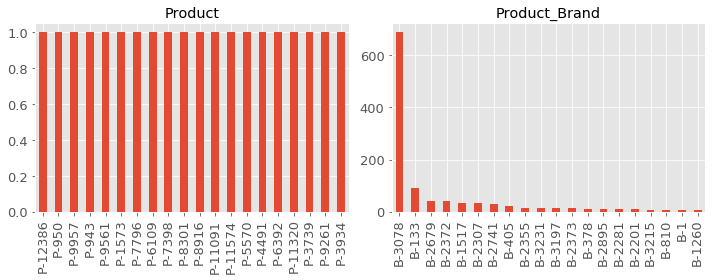

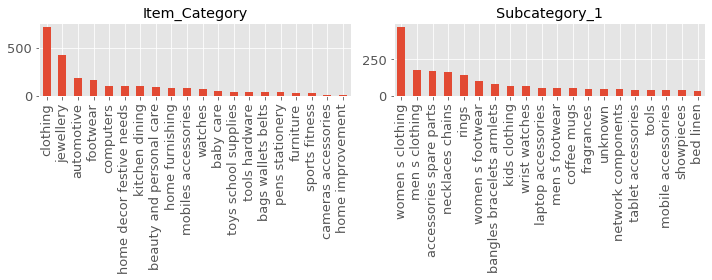

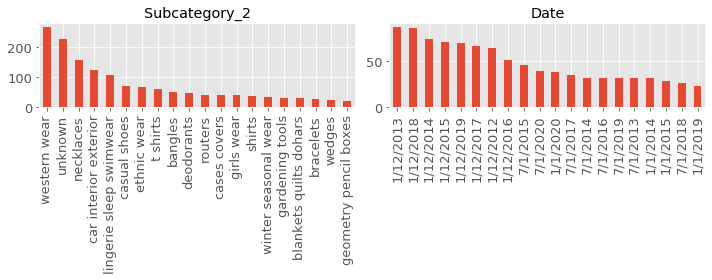

In [5]:
def plot_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(10,4))
                plt.subplot(121)
                dataframe[categorical_columns[i]].value_counts()[:20].plot(kind='bar')
                plt.title(categorical_columns[i])
                plt.subplot(122)     
                dataframe[categorical_columns[i+1]].value_counts()[:20].plot(kind='bar')
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.show()

            else:
                dataframe[categorical_columns[i]].value_counts()[:20].plot(kind='bar')
                plt.title(categorical_columns[i])
        
        
        
        
plot = plot_categorical_columns(train)

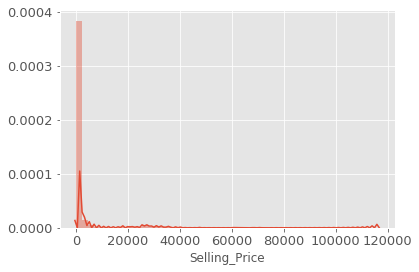

In [6]:
sns.distplot(train['Selling_Price'])

<Figure size 432x288 with 0 Axes>

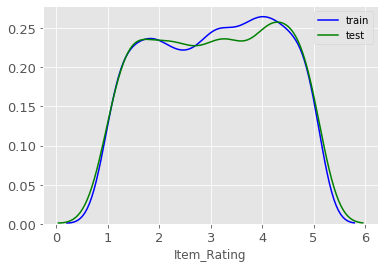

In [7]:
col = 'Item_Rating'

plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

## Feature engineeering

In [8]:
#Creating new feature luggage
train['Luggage']=train['Item_Category'].str.contains('bags')
train['Luggage']=train['Luggage'].astype(str)
train['Luggage']=train['Luggage'].str.replace('True','1')
train['Luggage']=train['Luggage'].str.replace('False','0')
train['Luggage']=train['Luggage'].astype(int)


test['Luggage']=test['Item_Category'].str.contains('bags')
test['Luggage']=test['Luggage'].astype(str)
test['Luggage']=test['Luggage'].str.replace('True','1')
test['Luggage']=test['Luggage'].str.replace('False','0')
test['Luggage']=test['Luggage'].astype(int)


#Creating New Feature mens & womens clothing & Kids clothing
def get_mens_product(Subcategory_1):
    Mens_product=list()
    for text in zip(Subcategory_1):
        if 'men s clothing' in text:
            Mens_product.append(1)
        else:
            Mens_product.append(0)
    return Mens_product

def get_womens_product(Subcategory_1):
    Womens_product=list()
    for text in zip(Subcategory_1):
        if 'women s clothing' in text:
            Womens_product.append(1)
        else:
            Womens_product.append(0)
    return Womens_product

def get_kids_product(Subcategory_1):
    Kids_product=list()
    for text in zip(Subcategory_1):
        if 'kids clothing' in text or 'infant wear' in text:
            Kids_product.append(1)
        else:
            Kids_product.append(0)
    return Kids_product




train['Mens_Clothing']=get_mens_product(train["Subcategory_1"])
test['Mens_Clothing']=get_mens_product(test["Subcategory_1"])


train['Womens_Clothing']=get_womens_product(train["Subcategory_1"])
test['Womens_Clothing']=get_womens_product(test["Subcategory_1"])

train['Kids_clothing']=get_kids_product(train["Subcategory_1"])
test['Kids_clothing']=get_kids_product(test["Subcategory_1"])

In [9]:
train.head(5)
test.head(5)

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Luggage,Mens_Clothing,Womens_Clothing,Kids_clothing
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.30,2/3/2017,291.00,1,0,0,0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.10,7/1/2015,897.00,0,0,1,0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.50,1/12/2019,792.00,0,0,0,0
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.00,12/12/2014,837.00,0,0,0,0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.30,12/12/2013,470.00,0,1,0,0


,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Luggage,Mens_Clothing,Womens_Clothing,Kids_clothing
0,P-11284,B-2984,computers,network components,routers,4.30,1/12/2018,0,0,0,0
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.00,20/12/2012,0,0,0,0
2,P-5843,B-3078,clothing,women s clothing,western wear,1.50,1/12/2014,0,0,1,0
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.90,1/12/2019,0,0,0,0
4,P-5586,B-3078,clothing,women s clothing,western wear,1.40,1/12/2017,0,0,1,0


In [12]:
#Adding Features Personal care, Electronics Accessories , Home Accessories
train['Personal_care']=0
test['Personal_care']=0
train['Electronics_accesories']=0
test['Electronics_accesories']=0
train['Home_Accessories']=0
test['Home_Accessories']=0

#Adding new feautre
for i,j in enumerate(train["Item_Category"]):
    if "jewellery" in j:
        train["Personal_care"][i]=1
    if 'beauty and personal care' in j:
        train["Personal_care"][i]=2
    if 'health personal care appliances' in j:
        train["Personal_care"][i]=3
    if 'sunglasses' in j:
        train['Personal_care'][i]=4


for i,j in enumerate(test["Item_Category"]):
    if "jewellery" in j:
        test["Personal_care"][i]=1
    if 'beauty and personal care' in j:
        test["Personal_care"][i]=2
    if 'health personal care appliances' in j:
        test["Personal_care"][i]=3
    
 
for i,j in enumerate(train["Item_Category"]):
    if "computers" in j:
        train["Electronics_accesories"][i]=1
    if 'mobiles accessories' in j:
        train["Electronics_accesories"][i]=2
    if 'cameras accessories' in j:
        train["Electronics_accesories"][i]=3
    if 'watches' in j:
        train["Electronics_accesories"][i]=4
    
for i,j in enumerate(test["Item_Category"]):
    if "computers" in j:
        test["Electronics_accesories"][i]=1
    if 'mobiles accessories' in j:
        test["Electronics_accesories"][i]=2
    if 'cameras accessories' in j:
        test["Electronics_accesories"][i]=3
    if 'watches' in j:
        test["Electronics_accesories"][i]=4

for i,j in enumerate(train["Item_Category"]):
    if "home decor festive needs" in j:
        train["Home_Accessories"][i]=1
    if 'kitchen dining' in j:
        train["Home_Accessories"][i]=2
    if 'home furnishing' in j:
        train["Home_Accessories"][i]=3
    if 'tools hardware' in j:
        train["Home_Accessories"][i]=4
    
for i,j in enumerate(test["Item_Category"]):
    if "home decor festive needs" in j:
        test["Home_Accessories"][i]=1
    if 'kitchen dining' in j:
        test["Home_Accessories"][i]=2
    if 'home furnishing' in j:
        test["Home_Accessories"][i]=3
    if 'tools hardware' in j:
        test["Home_Accessories"][i]=4
    

In [13]:
train.head(5)
test.head(5)

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Luggage,Mens_Clothing,Womens_Clothing,Kids_clothing,Personal_care,Electronics_accesories,Home_Accessories
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.30,2/3/2017,291.00,1,0,0,0,0,0,0
1,P-2453,B-3078,clothing,women s clothing,western wear,3.10,7/1/2015,897.00,0,0,1,0,0,0,0
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.50,1/12/2019,792.00,0,0,0,0,0,0,1
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.00,12/12/2014,837.00,0,0,0,0,2,0,0
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.30,12/12/2013,470.00,0,1,0,0,0,0,0


,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Luggage,Mens_Clothing,Womens_Clothing,Kids_clothing,Personal_care,Electronics_accesories,Home_Accessories
0,P-11284,B-2984,computers,network components,routers,4.30,1/12/2018,0,0,0,0,0,1,0
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.00,20/12/2012,0,0,0,0,1,0,0
2,P-5843,B-3078,clothing,women s clothing,western wear,1.50,1/12/2014,0,0,1,0,0,0,0
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.90,1/12/2019,0,0,0,0,1,0,0
4,P-5586,B-3078,clothing,women s clothing,western wear,1.40,1/12/2017,0,0,1,0,0,0,0


In [14]:
# processing date column
train['date'] = pd.to_datetime(train['Date'])
test['date'] = pd.to_datetime(test['Date'])

train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
train['day'] = train['date'].dt.dayofweek
test['day'] = test['date'].dt.dayofweek

In [28]:
train.head(5)
test.head(5)

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Selling_Price,Luggage,Mens_Clothing,Womens_Clothing,Kids_clothing,Personal_care,Electronics_accesories,Home_Accessories,date,year,month,day
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.30,2/3/2017,291.00,1,0,0,0,0,0,0,2017-02-03,2017,2,4
1,P-2453,B-3078,clothing,women s clothing,western wear,3.10,7/1/2015,897.00,0,0,1,0,0,0,0,2015-07-01,2015,7,2
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.50,1/12/2019,792.00,0,0,0,0,0,0,1,2019-01-12,2019,1,5
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.00,12/12/2014,837.00,0,0,0,0,2,0,0,2014-12-12,2014,12,4
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.30,12/12/2013,470.00,0,1,0,0,0,0,0,2013-12-12,2013,12,3


,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Luggage,Mens_Clothing,Womens_Clothing,Kids_clothing,Personal_care,Electronics_accesories,Home_Accessories,date,year,month,day
0,P-11284,B-2984,computers,network components,routers,4.30,1/12/2018,0,0,0,0,0,1,0,2018-01-12,2018,1,4
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.00,20/12/2012,0,0,0,0,1,0,0,2012-12-20,2012,12,3
2,P-5843,B-3078,clothing,women s clothing,western wear,1.50,1/12/2014,0,0,1,0,0,0,0,2014-01-12,2014,1,6
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.90,1/12/2019,0,0,0,0,1,0,0,2019-01-12,2019,1,5
4,P-5586,B-3078,clothing,women s clothing,western wear,1.40,1/12/2017,0,0,1,0,0,0,0,2017-01-12,2017,1,3


In [32]:
#Frequency Encoding

X = train.drop('Selling_Price', axis=1)
y = train['Selling_Price']
Xt = test.copy()

def frequency_encoding(column, df, df_test=None):
    frequencies = df[column].value_counts().reset_index()
    df_values = df[[column]].merge(frequencies, how='left', 
                                   left_on=column, right_on='index').iloc[:,-1].values
    if df_test is not None:
        df_test_values = df_test[[column]].merge(frequencies, how='left', 
                                                 left_on=column, right_on='index').fillna(1).iloc[:,-1].values
    else:
        df_test_values = None
    return df_values, df_test_values

for column in ['Product_Brand','Item_Category', 'Subcategory_1','Subcategory_2','Item_Rating','Luggage','Mens_Clothing','Womens_Clothing','Kids_clothing','Personal_care','Electronics_accesories','Home_Accessories','date','year','month','day']:
    train_values, test_values = frequency_encoding(column, X, Xt)
    X[column+'_counts'] = train_values
    Xt[column+'_counts'] = test_values

In [33]:
X.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Luggage,Mens_Clothing,Womens_Clothing,Kids_clothing,Personal_care,Electronics_accesories,Home_Accessories,date,year,month,day,Product_Brand_counts,Item_Category_counts,Subcategory_1_counts,Subcategory_2_counts,Item_Rating_counts,Luggage_counts,Mens_Clothing_counts,Womens_Clothing_counts,Kids_clothing_counts,Personal_care_counts,Electronics_accesories_counts,Home_Accessories_counts,date_counts,year_counts,month_counts,day_counts
0,P-2610,B-659,bags wallets belts,bags,hand bags,4.30,2/3/2017,1,0,0,0,0,0,0,2017-02-03,2017,2,4,1,38,27,13,71,38,2278,1976,2364,1924,2199,2137,3,319,85,335
1,P-2453,B-3078,clothing,women s clothing,western wear,3.10,7/1/2015,0,0,1,0,0,0,0,2015-07-01,2015,7,2,688,717,476,267,67,2414,2278,476,2364,1924,2199,2137,46,313,296,349
2,P-6802,B-1810,home decor festive needs,showpieces,ethnic,3.50,1/12/2019,0,0,0,0,0,0,1,2019-01-12,2019,1,5,2,98,35,14,63,2414,2278,1976,2364,1924,2199,98,69,308,773,407
3,P-4452,B-3078,beauty and personal care,eye care,h2o plus eye care,4.00,12/12/2014,0,0,0,0,2,0,0,2014-12-12,2014,12,4,688,90,2,1,92,2414,2278,1976,2364,90,2199,2137,10,310,598,335
4,P-8454,B-3078,clothing,men s clothing,t shirts,4.30,12/12/2013,0,1,0,0,0,0,0,2013-12-12,2013,12,3,688,717,174,61,71,2414,174,1976,2364,1924,2199,2137,7,289,598,331


In [34]:
Xt.head()

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Date,Luggage,Mens_Clothing,Womens_Clothing,Kids_clothing,Personal_care,Electronics_accesories,Home_Accessories,date,year,month,day,Product_Brand_counts,Item_Category_counts,Subcategory_1_counts,Subcategory_2_counts,Item_Rating_counts,Luggage_counts,Mens_Clothing_counts,Womens_Clothing_counts,Kids_clothing_counts,Personal_care_counts,Electronics_accesories_counts,Home_Accessories_counts,date_counts,year_counts,month_counts,day_counts
0,P-11284,B-2984,computers,network components,routers,4.30,1/12/2018,0,0,0,0,0,1,0,2018-01-12,2018,1,4,2.00,104.00,42.00,41.00,71,2414,2278,1976,2364,1924,104,2137,85.00,316,773,335
1,P-6580,B-1732,jewellery,bangles bracelets armlets,bracelets,3.00,20/12/2012,0,0,0,0,1,0,0,2012-12-20,2012,12,3,1.00,428.00,77.00,27.00,72,2414,2278,1976,2364,428,2199,2137,12.00,147,598,331
2,P-5843,B-3078,clothing,women s clothing,western wear,1.50,1/12/2014,0,0,1,0,0,0,0,2014-01-12,2014,1,6,688.00,717.00,476.00,267.00,62,2414,2278,476,2364,1924,2199,2137,74.00,310,773,338
3,P-5334,B-1421,jewellery,necklaces chains,necklaces,3.90,1/12/2019,0,0,0,0,1,0,0,2019-01-12,2019,1,5,4.00,428.00,160.00,158.00,53,2414,2278,1976,2364,428,2199,2137,69.00,308,773,407
4,P-5586,B-3078,clothing,women s clothing,western wear,1.40,1/12/2017,0,0,1,0,0,0,0,2017-01-12,2017,1,3,688.00,717.00,476.00,267.00,51,2414,2278,476,2364,1924,2199,2137,66.00,319,773,331
